In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.utils.visualize_util import plot


%matplotlib inline
import matplotlib.pyplot as plt
import sys
import time


Using Theano backend.


In [13]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_train = X_train.shape[0]
num_test = X_test.shape[0]
im_width  = X_train.shape[1]
im_height = X_train.shape[2]
print "shape before"
print X_train.shape
X_train = X_train.reshape(num_train,1, im_width,im_height)
X_test = X_test.reshape(num_test,1, im_width,im_height)

print "shape after"
print X_train.shape
# change type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# normalize the range
print('maximum of X_train:',np.max(X_train[:]))
X_train /= 255.0;
X_test /= 255.0;
print('maximum of X_train:',np.max(X_train[:]))

# convert class vectors to binary class matrices (one hot representation)
nb_classes = np.unique(y_train).size
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


shape before
(60000, 28, 28)
shape after
(60000, 1, 28, 28)
('maximum of X_train:', 255.0)
('maximum of X_train:', 1.0)


In [14]:

# construct the network
model = Sequential()
model.add(Convolution2D(64, 10, 10, border_mode='same', input_shape=(1,im_width,im_height)))
model.add(Activation('relu'))
model.add(Dropout(0.23))
model.add(MaxPooling2D(pool_size=(3,3), strides=None, border_mode='valid'))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.23))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()



____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_2 (Convolution2D)    (None, 64, 28, 28)  6464        convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_4 (Activation)          (None, 64, 28, 28)  0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_3 (Dropout)                (None, 64, 28, 28)  0           activation_4[0][0]               
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)      (None, 64, 9, 9)    0           dropout_3[0][0]                  
___________________________________________________________________________________________

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [19]:
batch_size = 128
nb_epoch = 3
start = time.time()
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
end = time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 234s - loss: 0.1766 - acc: 0.9460 - val_loss: 0.0589 - val_acc: 0.9843
Epoch 2/3
60000/60000 [==============================] - 227s - loss: 0.0757 - acc: 0.9771 - val_loss: 0.0417 - val_acc: 0.9867
Epoch 3/3
60000/60000 [==============================] - 236s - loss: 0.0544 - acc: 0.9831 - val_loss: 0.0342 - val_acc: 0.9892


In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)

print 'Test score:   ', score[0]
print 'Test accuracy:', score[1]
print 'Time elapsed: ',(end - start), "seconds"

Test score:    0.0341595257929
Test accuracy: 0.9892
Time elapsed:  698.53365016 seconds


In [ ]:
print model

In [5]:
plot(model, to_file='model.png')

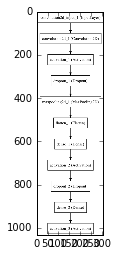

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('model.png')
plt.imshow(img)

In [21]:
model.save_weights('modelWeights.h5')